# DATA VISUALIZATION AND DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Data = pd.read_csv('mental_health.csv')
Data.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [4]:
Data.tail()

,text,label
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1
27976,got nudes person might might know snapchat do ...,0


<Axes: xlabel='label', ylabel='count'>

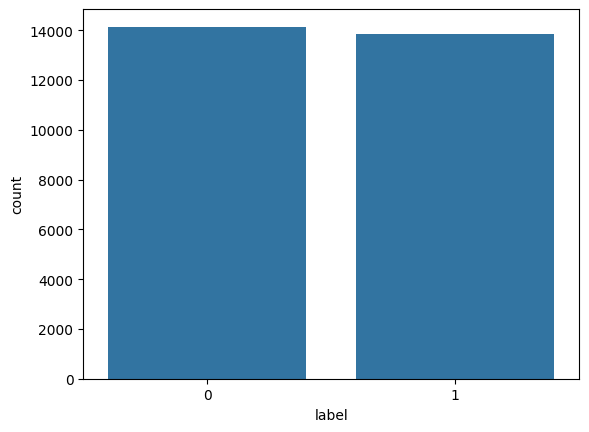

In [5]:
sns.countplot(x='label',data=Data)

(array([14139.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13838.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

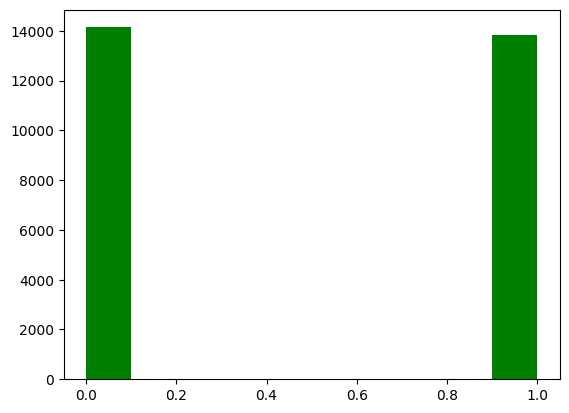

In [6]:
plt.hist(Data['label'],color='green')

<Axes: ylabel='Density'>

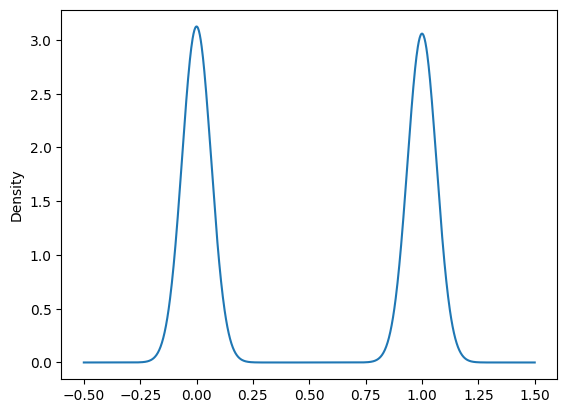

In [7]:
Data['label'].plot(kind='density')

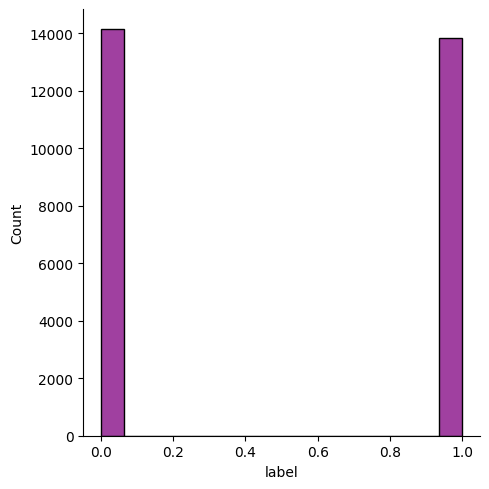

In [8]:
sns.displot(Data['label'], color='purple') 

<Axes: ylabel='label'>

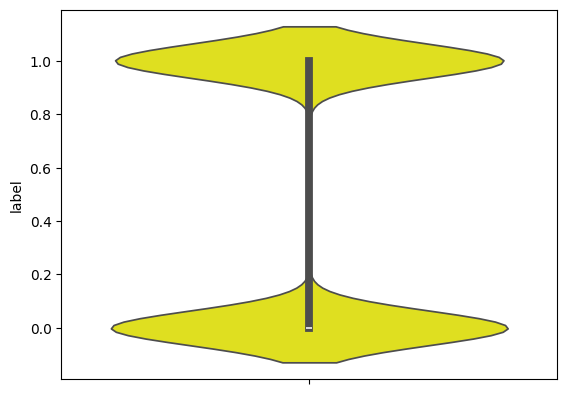

In [9]:
sns.violinplot(Data['label'], color='yellow') 

<Axes: xlabel='label', ylabel='Proportion'>

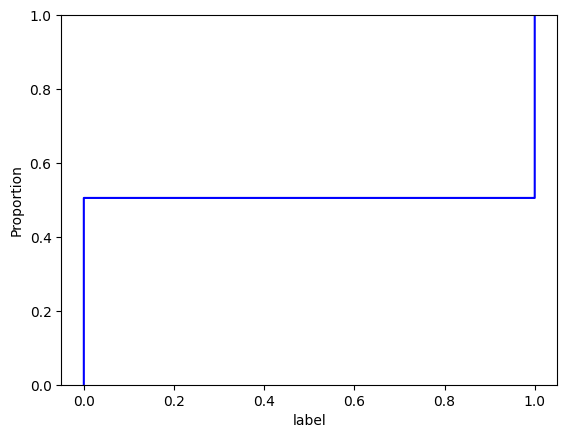

In [10]:
sns.ecdfplot(Data['label'], color='blue') 

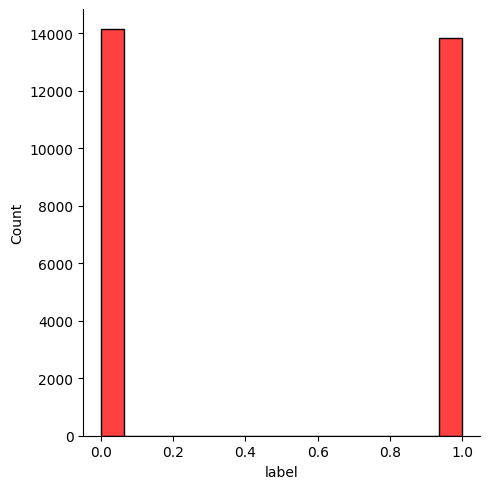

In [11]:
sns.displot(Data['label'], color='RED') 

In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [13]:
# Define preprocess function for text preprocessing

def preprocess_text(text):
    
    # Check for NaN values and handle them
    
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    
    text = text.lower()
    
    # Remove special characters and digits
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization and remove stop words
    
    stop_words = set(stopwords.words('english'))
    
    words = [word for word in word_tokenize(text) if word not in stop_words]
    
    # Stemming
    
    ps = PorterStemmer()
    
    words = [ps.stem(word) for word in words]
    
    # Join the preprocessed words back into a single string
    
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [14]:
Data['text'] = Data['text'].apply(preprocess_text)

In [15]:
from sklearn.model_selection import train_test_split

X,X_test,y,y_test = train_test_split(Data.loc[:,'text':],Data['label'],test_size=0.2)

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 799.5, 799.5, -0.5)

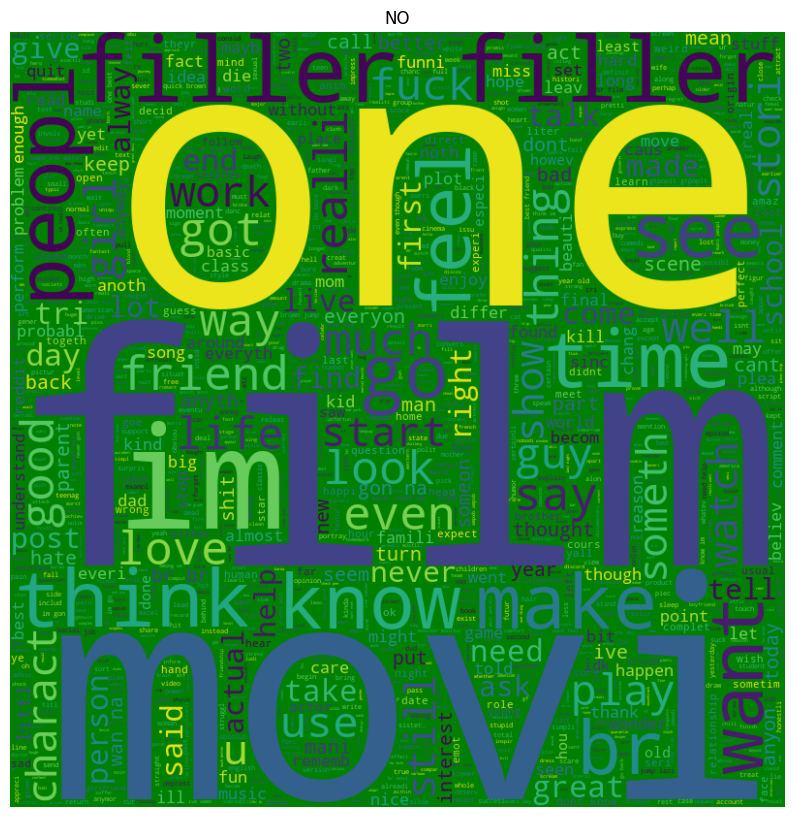

In [20]:
sexual = ' '.join(Data.loc[Data['label'] == 0, 'text'].values)
sexual_text = WordCloud(background_color='GREEN',max_words=2000,width = 800, height = 800).generate(sexual)

plt.figure(figsize=[10,30])

plt.imshow(sexual_text,interpolation='bilinear')
plt.title('NO')
plt.axis('off')

Text(0.5, 1.0, 'YES')

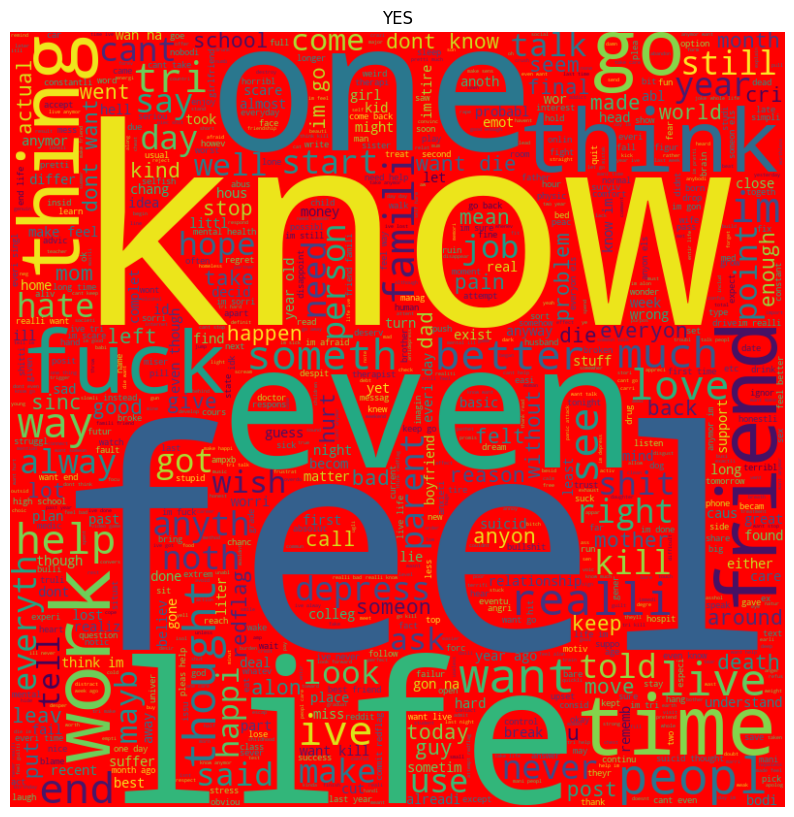

In [21]:
physical = ' '.join(Data.loc[Data['label'] == 1, 'text'].values)
physical_text = WordCloud(background_color='RED',max_words=2000,width = 800, height = 800).generate(physical)

plt.figure(figsize=[10,30])

plt.imshow(physical_text, interpolation='bilinear')
plt.axis('off')
plt.title('YES')